<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_03/05_Einsum_Operations_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Section 1: Setup
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [2]:
a = tf.constant([1., 2., 3.])
b = tf.constant([4., 5., 6.])

In [3]:
# Vector Sum: "i->"
vec_sum = tf.einsum("i->", a)
print("Vector Sum (i->):", vec_sum.numpy())

Vector Sum (i->): 6.0


In [4]:
# Vector Scaling: "i,i->i"
scaled = tf.einsum("i,i->i", a, b)
print("Element-wise Scaling (i,i->i):", scaled.numpy())

Element-wise Scaling (i,i->i): [ 4. 10. 18.]


In [5]:
# Dot Product: "i,i->"
dot = tf.einsum("i,i->", a, b)
print("Dot Product (i,i->):", dot.numpy())

Dot Product (i,i->): 32.0


In [6]:
# Outer Product: "i,j->ij"
outer = tf.einsum("i,j->ij", a, b)
print("Outer Product (i,j->ij):\n", outer.numpy())


Outer Product (i,j->ij):
 [[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]


In [7]:
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])
v = tf.constant([1., 2.])

In [8]:
# Transpose: "ij->ji"
transpose = tf.einsum("ij->ji", A)
print("Transpose (ij->ji):\n", transpose.numpy())

Transpose (ij->ji):
 [[1. 3.]
 [2. 4.]]


In [9]:
# Sum of all elements: "ij->"
total = tf.einsum("ij->", A)
print("Sum of All Elements (ij->):", total.numpy())

Sum of All Elements (ij->): 10.0


In [10]:
# Row Sum: "ij->i"
row_sum = tf.einsum("ij->i", A)
print("Row Sum (ij->i):", row_sum.numpy())

Row Sum (ij->i): [3. 7.]


In [11]:
# Column Sum: "ij->j"
col_sum = tf.einsum("ij->j", A)
print("Column Sum (ij->j):", col_sum.numpy())

Column Sum (ij->j): [4. 6.]


In [12]:
# Matrix-vector multiplication: "ij,j->i"
mat_vec = tf.einsum("ij,j->i", A, v)
print("Matrix-Vector Multiplication (ij,j->i):", mat_vec.numpy())

Matrix-Vector Multiplication (ij,j->i): [ 5. 11.]


In [13]:
# Matrix-matrix multiplication: "ik,kj->ij"
mat_mat = tf.einsum("ik,kj->ij", A, B)
print("Matrix-Matrix Multiplication (ik,kj->ij):\n", mat_mat.numpy())


Matrix-Matrix Multiplication (ik,kj->ij):
 [[19. 22.]
 [43. 50.]]


In [14]:
# Dot product of matrices: "ij,ij->"
mat_dot = tf.einsum("ij,ij->", A, B)
print("Matrix-wise Dot Product (ij,ij->):", mat_dot.numpy())

Matrix-wise Dot Product (ij,ij->): 70.0


In [15]:
# Hadamard product: "ij,ij->ij"
hadamard = tf.einsum("ij,ij->ij", A, B)
print("Hadamard Product (ij,ij->ij):\n", hadamard.numpy())

Hadamard Product (ij,ij->ij):
 [[ 5. 12.]
 [21. 32.]]


In [16]:
# Diagonal: "ii->i"
diag = tf.einsum("ii->i", tf.constant([[1., 2.], [3., 4.]]))
print("Matrix Diagonal (ii->i):", diag.numpy())

Matrix Diagonal (ii->i): [1. 4.]


In [17]:
# Trace: "ii->"
trace = tf.einsum("ii->", tf.constant([[1., 2.], [3., 4.]]))
print("Matrix Trace (ii->):", trace.numpy())


Matrix Trace (ii->): 5.0


In [18]:
batch = 2
seq_len = 4
dim = 8

Q = tf.random.normal((batch, seq_len, dim))
K = tf.random.normal((batch, seq_len, dim))

# Attention score computation: "bij,bkj->bik"
attn = tf.einsum("bij,bkj->bik", Q, K)
print("Self-Attention Score shape (bij,bkj->bik):", attn.shape)


Self-Attention Score shape (bij,bkj->bik): (2, 4, 4)


In [19]:
#RGB to Grayscale Image

# Fake RGB image: (batch, height, width, channels)
img = tf.random.uniform((1, 3, 3, 3))
weights = tf.constant([0.2989, 0.5870, 0.1140])  # grayscale weights

gray = tf.einsum("bhwc,c->bhw", img, weights)
print("Grayscale image shape (bhwc,c->bhw):", gray.shape)


Grayscale image shape (bhwc,c->bhw): (1, 3, 3)


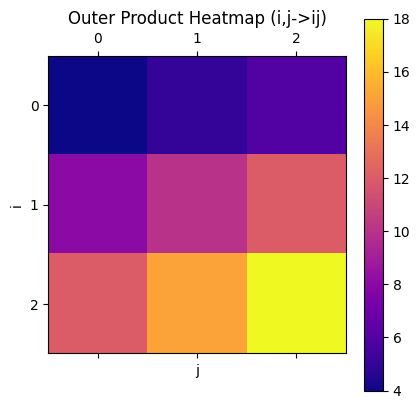

In [20]:
# ✅ Section 9: Visualize Outer Product
plt.matshow(outer.numpy(), cmap="plasma")
plt.title("Outer Product Heatmap (i,j->ij)")
plt.xlabel("j")
plt.ylabel("i")
plt.colorbar()
plt.show()
